In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [26]:
# Örnek veri seti oluşturma
data = pd.read_csv(r"C:\Users\realb\Desktop\a\food-price-index-september-2023-index-numbers.csv")

In [27]:
data.head()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
0,CPIM.SE901,1960.01,45.923461,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
1,CPIM.SE901,1960.02,45.498637,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
2,CPIM.SE901,1960.03,45.116296,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
3,CPIM.SE901,1960.04,45.158779,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food
4,CPIM.SE901,1960.05,45.286226,FINAL,Index,Consumers Price Index - CPI,Food Price Index for New Zealand,Food


In [28]:
data.tail()

,Series_reference,Period,Data_value,STATUS,UNITS,Subject,Group,Series_title_1
12863,CPIM.SE901502,2023.05,1347.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
12864,CPIM.SE901502,2023.06,1361.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
12865,CPIM.SE901502,2023.07,1366.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
12866,CPIM.SE901502,2023.08,1367.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food
12867,CPIM.SE901502,2023.09,1370.0,FINAL,Index,Consumers Price Index - CPI,Food Price Index Level 3 Classes for New Zealand,Ready-to-eat food


In [29]:
data.isnull().sum()

Series_reference    0
Period              0
Data_value          3
STATUS              0
UNITS               0
Subject             0
Group               0
Series_title_1      0
dtype: int64

In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Period,12868.0,2006.900591,11.981712,1960.010000,2001.040000,2009.04000,2016.07,2023.09
Data_value,12865.0,834.473656,250.237908,45.116296,692.129104,873.43441,1012.00,2233.00


In [31]:
data.dtypes

Series_reference     object
Period              float64
Data_value          float64
STATUS               object
UNITS                object
Subject              object
Group                object
Series_title_1       object
dtype: object

In [32]:
data.shape

(12868, 8)

In [18]:
date.index

RangeIndex(start=0, stop=12868, step=1)

### Veri görselleştirme çalışmaları

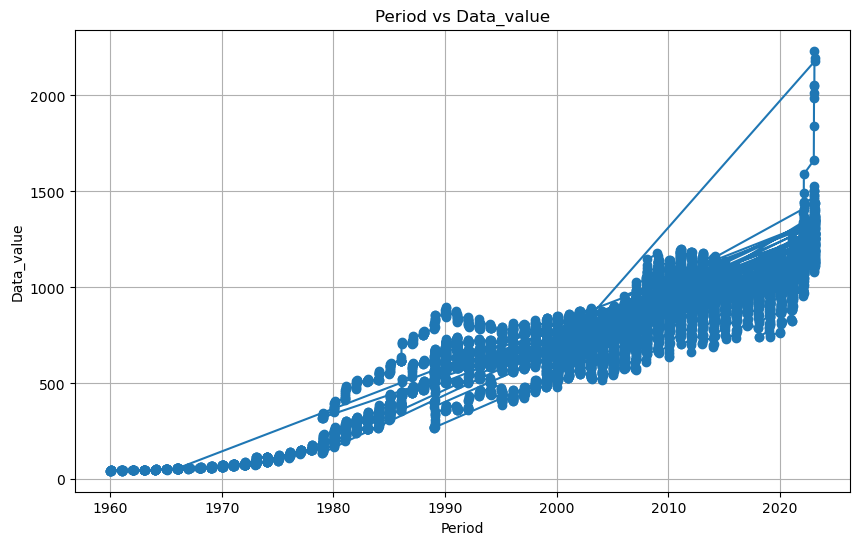

In [33]:
df = pd.DataFrame(data)

# Line Chart (Period vs Data_value)
plt.figure(figsize=(10, 6))
plt.plot(df['Period'], df['Data_value'], marker='o')
plt.title('Period vs Data_value')
plt.xlabel('Period')
plt.ylabel('Data_value')
plt.grid(True)
plt.show()

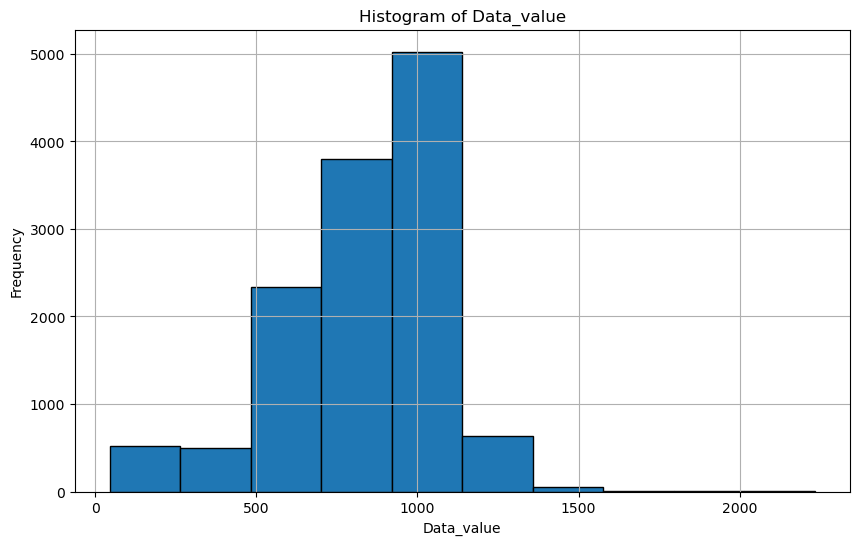

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(df['Data_value'], bins=10, edgecolor='black')
plt.title('Histogram of Data_value')
plt.xlabel('Data_value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

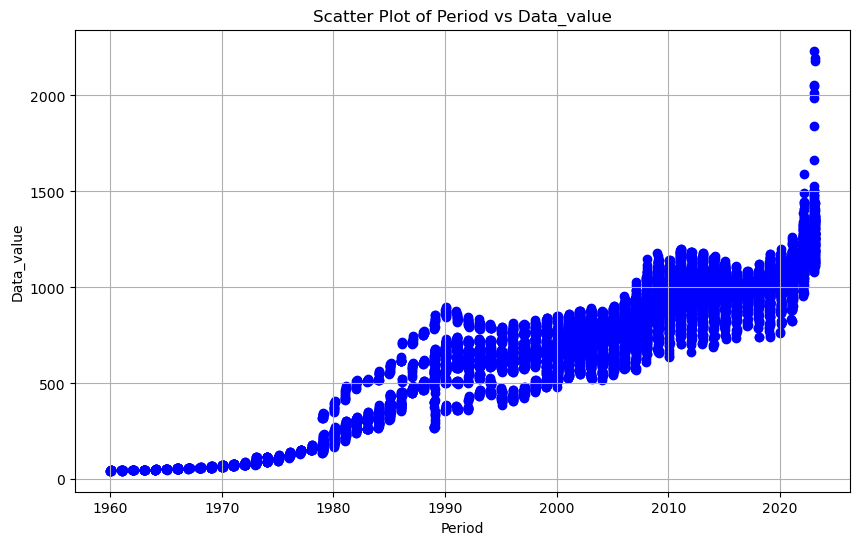

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Period'], df['Data_value'], c='blue', marker='o')
plt.title('Scatter Plot of Period vs Data_value')
plt.xlabel('Period')
plt.ylabel('Data_value')
plt.grid(True)
plt.show()


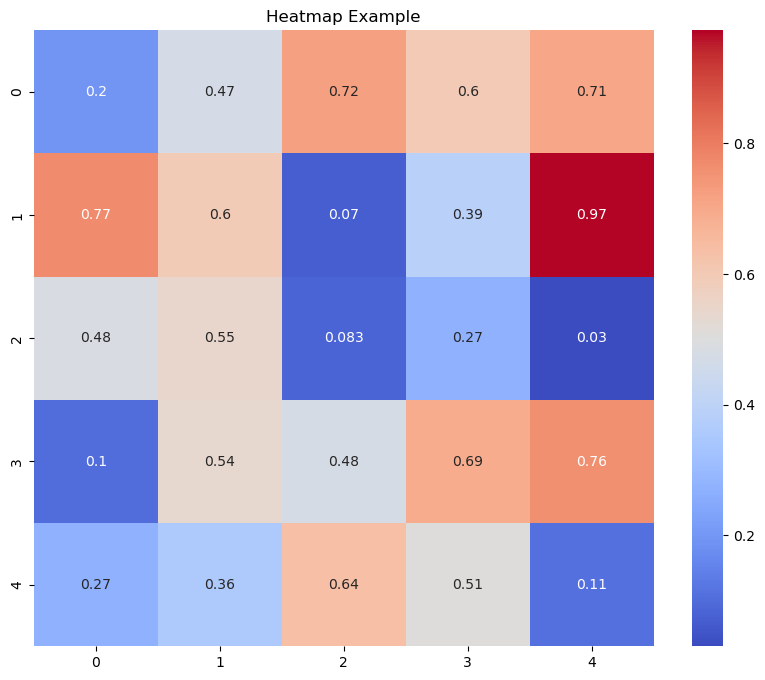

In [44]:
# Örnek bir korelasyon matrisi
correlation_matrix = np.random.rand(5, 5)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Example')
plt.show()

C:\Users\realb\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


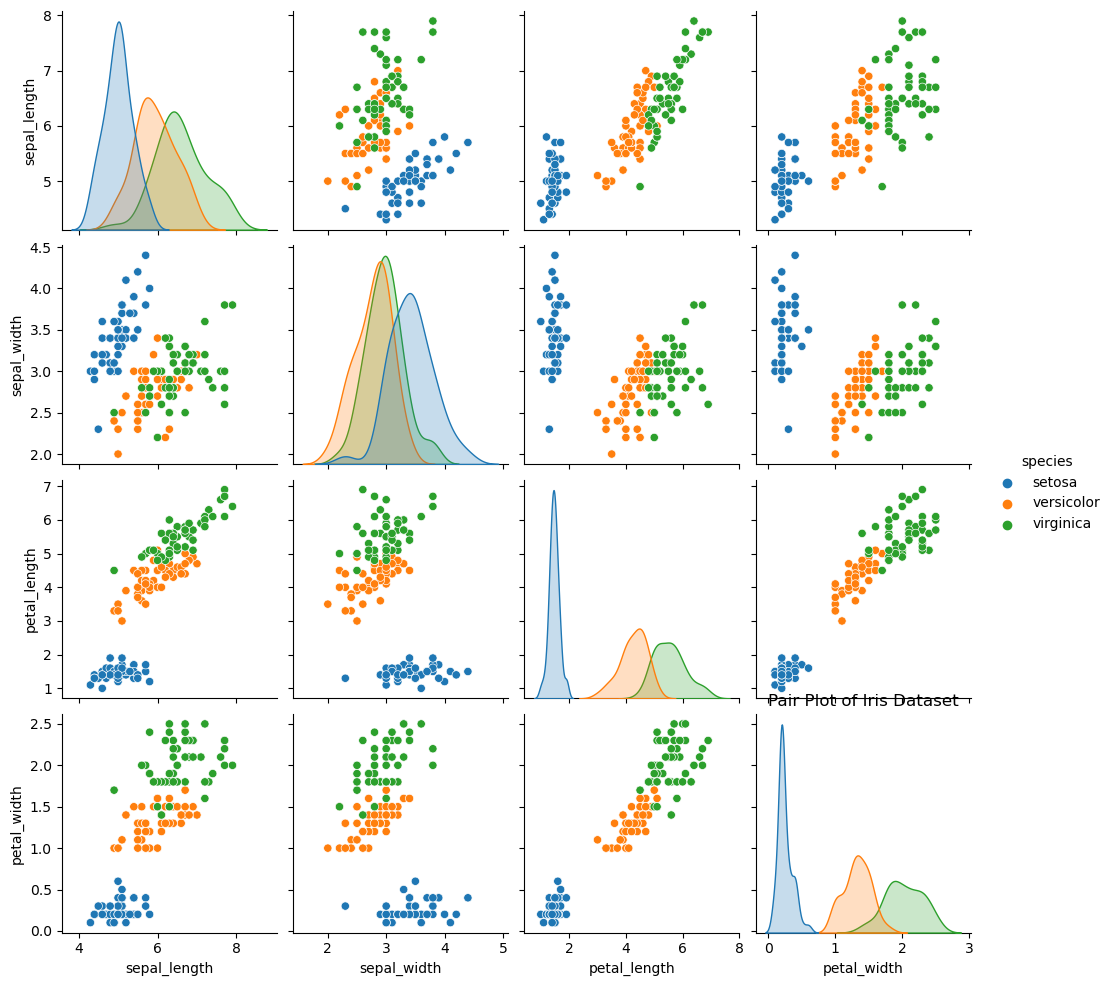

In [45]:
# Örnek veri seti
iris = sns.load_dataset('iris')
sns.pairplot(iris, hue='species')
plt.title('Pair Plot of Iris Dataset')
plt.show()

### Makine öğrenmesi modeli

In [54]:
# Eksik değerleri içeren satırları kaldırma
df_clean = df.dropna()

In [55]:
# Özellikler ve hedef değişken
X = df_clean[['Period']]  # Özellikler
y = df_clean['Data_value']  # Hedef değişken

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Modeli oluşturma
model = DecisionTreeRegressor()  # Ağaç modeli kullanıyorum.
model.fit(X_train, y_train)

# Tahmin yapma
y_pred = model.predict(X_test)

# Performans değerlendirme
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 7411.352403703575


### Modele tahmin etme

In [60]:
# Tahmin yapmak için bir örnek seçme
example_period = [[3]]  # Tahmin yapılacak örnek 'Period' değeri (örneğin, Period=3)
predicted_value = model.predict(example_period)

print(f'Period {example_period[0][0]} için tahmin edilen Data_value: {predicted_value[0]}')

Period 3 için tahmin edilen Data_value: 45.49863746


C:\Users\realb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [70]:
# Üçüncü veriyi seçme (0 tabanlı indeksleme ile 2. indeks)
third_row = df.iloc[2]

# 'Data_value' değerini yazdırma
data_value = third_row['Data_value']

print(f"Üçüncü satırdaki Data_value: {data_value}")

Üçüncü satırdaki Data_value: 45.11629607


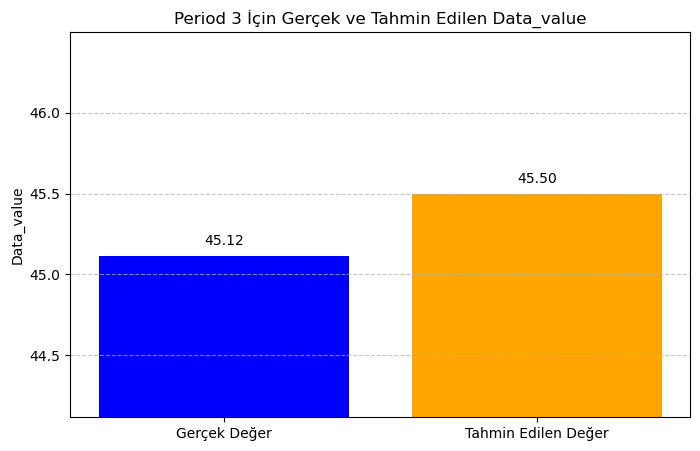

In [71]:
# Gerçek ve tahmin edilen değerler
actual_value = 45.11629607
predicted_value = 45.49863746
period = 3

# Çubuk grafik için veriler
labels = ['Gerçek Değer', 'Tahmin Edilen Değer']
values = [actual_value, predicted_value]

# Grafik oluşturma
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['blue', 'orange'])
plt.title(f'Period {period} İçin Gerçek ve Tahmin Edilen Data_value')
plt.ylabel('Data_value')
plt.ylim(min(values) - 1, max(values) + 1)  # Grafik eksenini ayarlama
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Değerleri grafik üzerinde gösterme
for i, value in enumerate(values):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', va='bottom')

# Grafiği gösterme
plt.show()